In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/sensor_kmitl/anormal/anormal1.10.csv")
df.head()

,sec,temp
0,0.0,31.433723
1,0.5,31.462907
2,1.0,31.504368
3,1.5,31.537386
4,2.0,31.557809


In [ ]:
df.head()

,sec,temp
0,0.0,31.433723
1,0.5,31.462907
2,1.0,31.504368
3,1.5,31.537386
4,2.0,31.557809


In [ ]:
!sudo apt-get install tree
!tree /content/drive/MyDrive/sensor_kmitl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (117 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 121925 files and directories currently install

### Avg SNR (Signal to Noise Ratio)

In [ ]:
import pandas as pd
import numpy as np
import os

def calculate_snr(signal):
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean((signal - np.mean(signal)) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def average_snr(folder_path):
    snr_values = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            data = pd.read_csv(file_path)
            signal = data['temp'].values
            snr = calculate_snr(signal)
            snr_values.append(snr)
    average_snr = np.mean(snr_values)
    return average_snr

normal_folder = '/content/drive/MyDrive/sensor_kmitl/normal'
anormal_folder = '/content/drive/MyDrive/sensor_kmitl/anormal'

avg_snr_normal = average_snr(normal_folder)
avg_snr_anormal = average_snr(anormal_folder)

print(f'Average SNR for normal signals: {avg_snr_normal:.2f} dB')
print(f'Average SNR for anormal signals: {avg_snr_anormal:.2f} dB')


Average SNR for normal signals: 40.42 dB
Average SNR for anormal signals: 38.65 dB


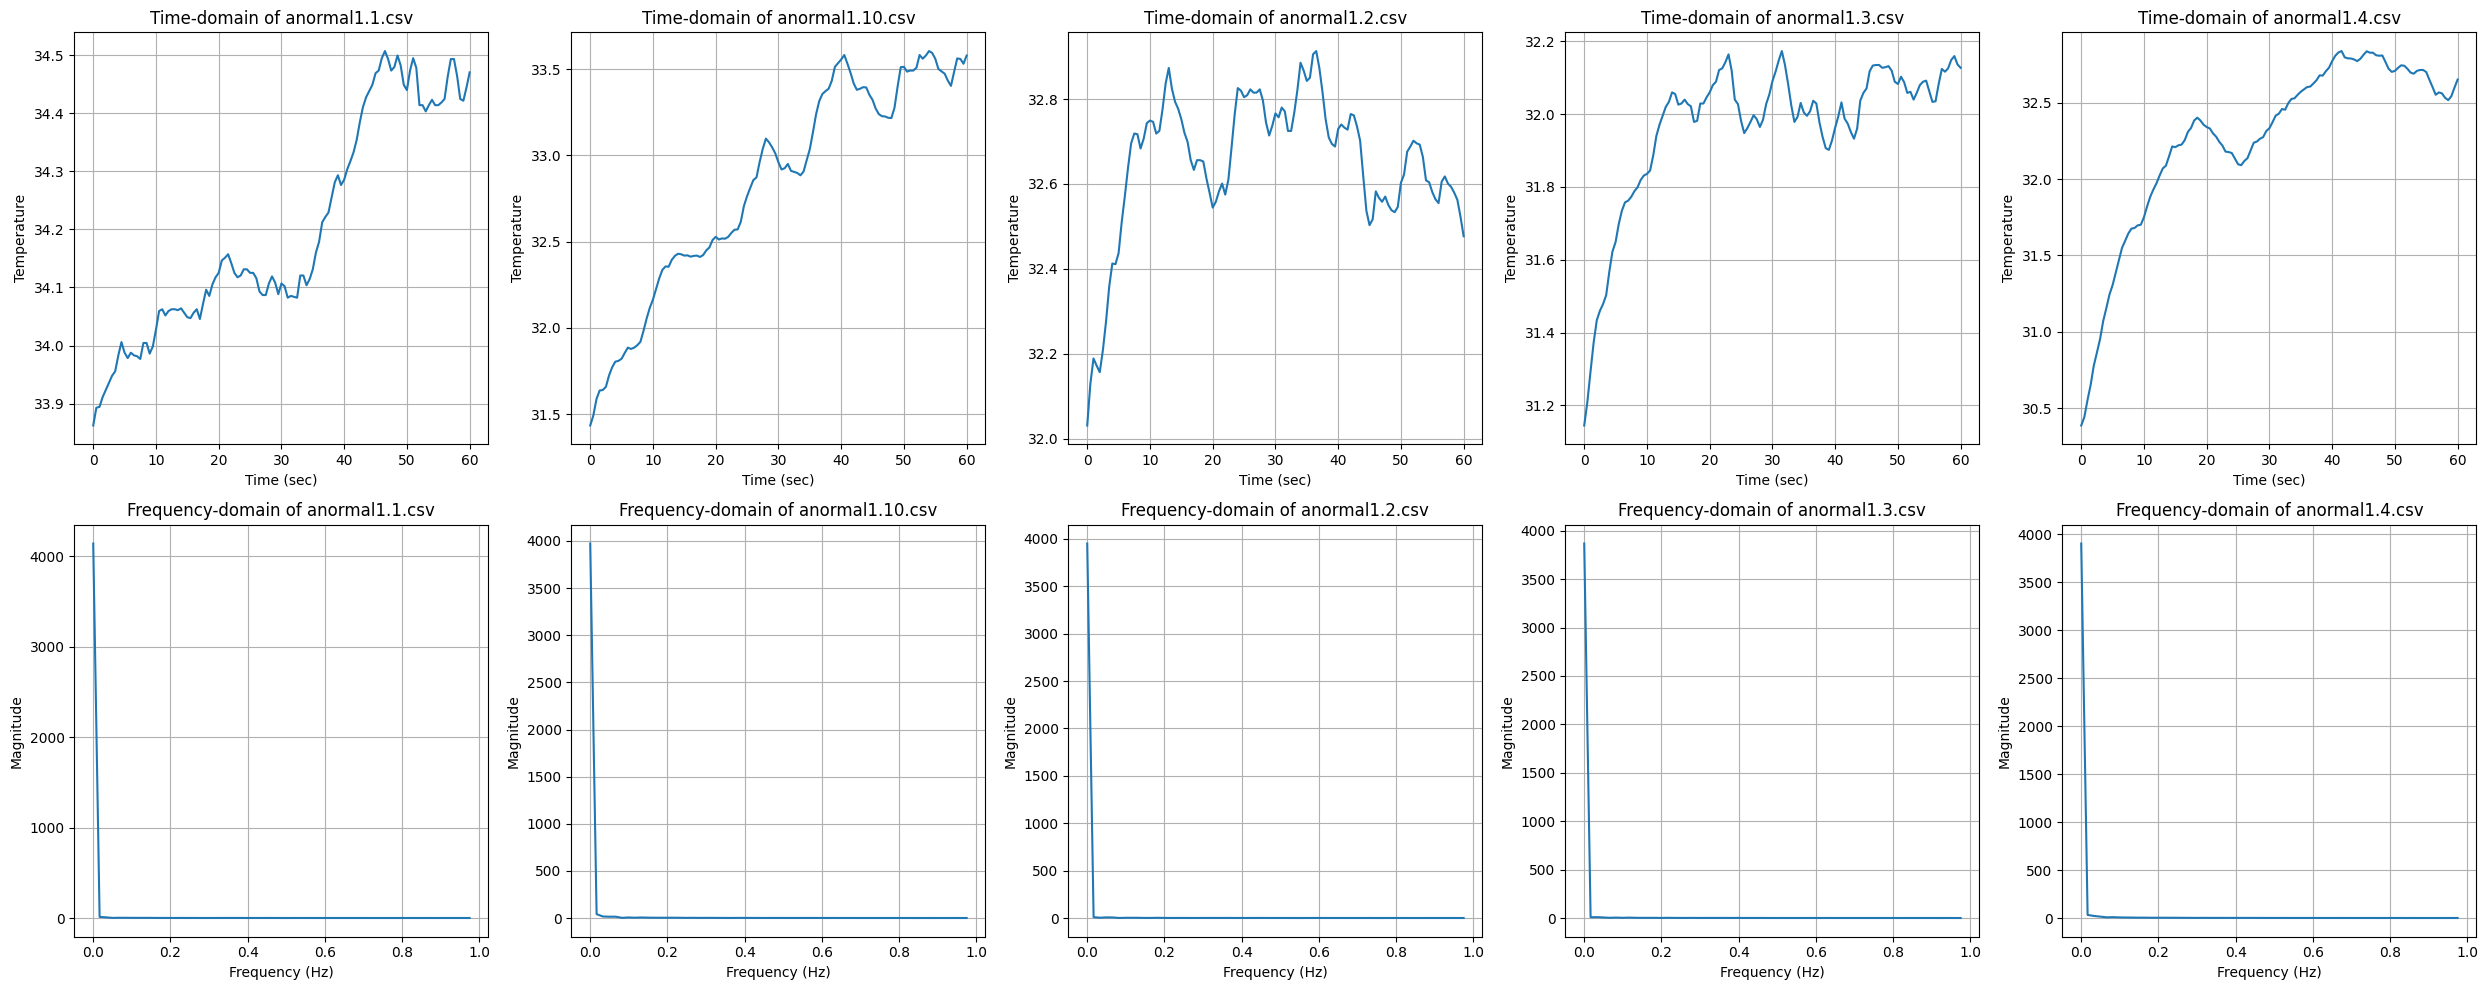

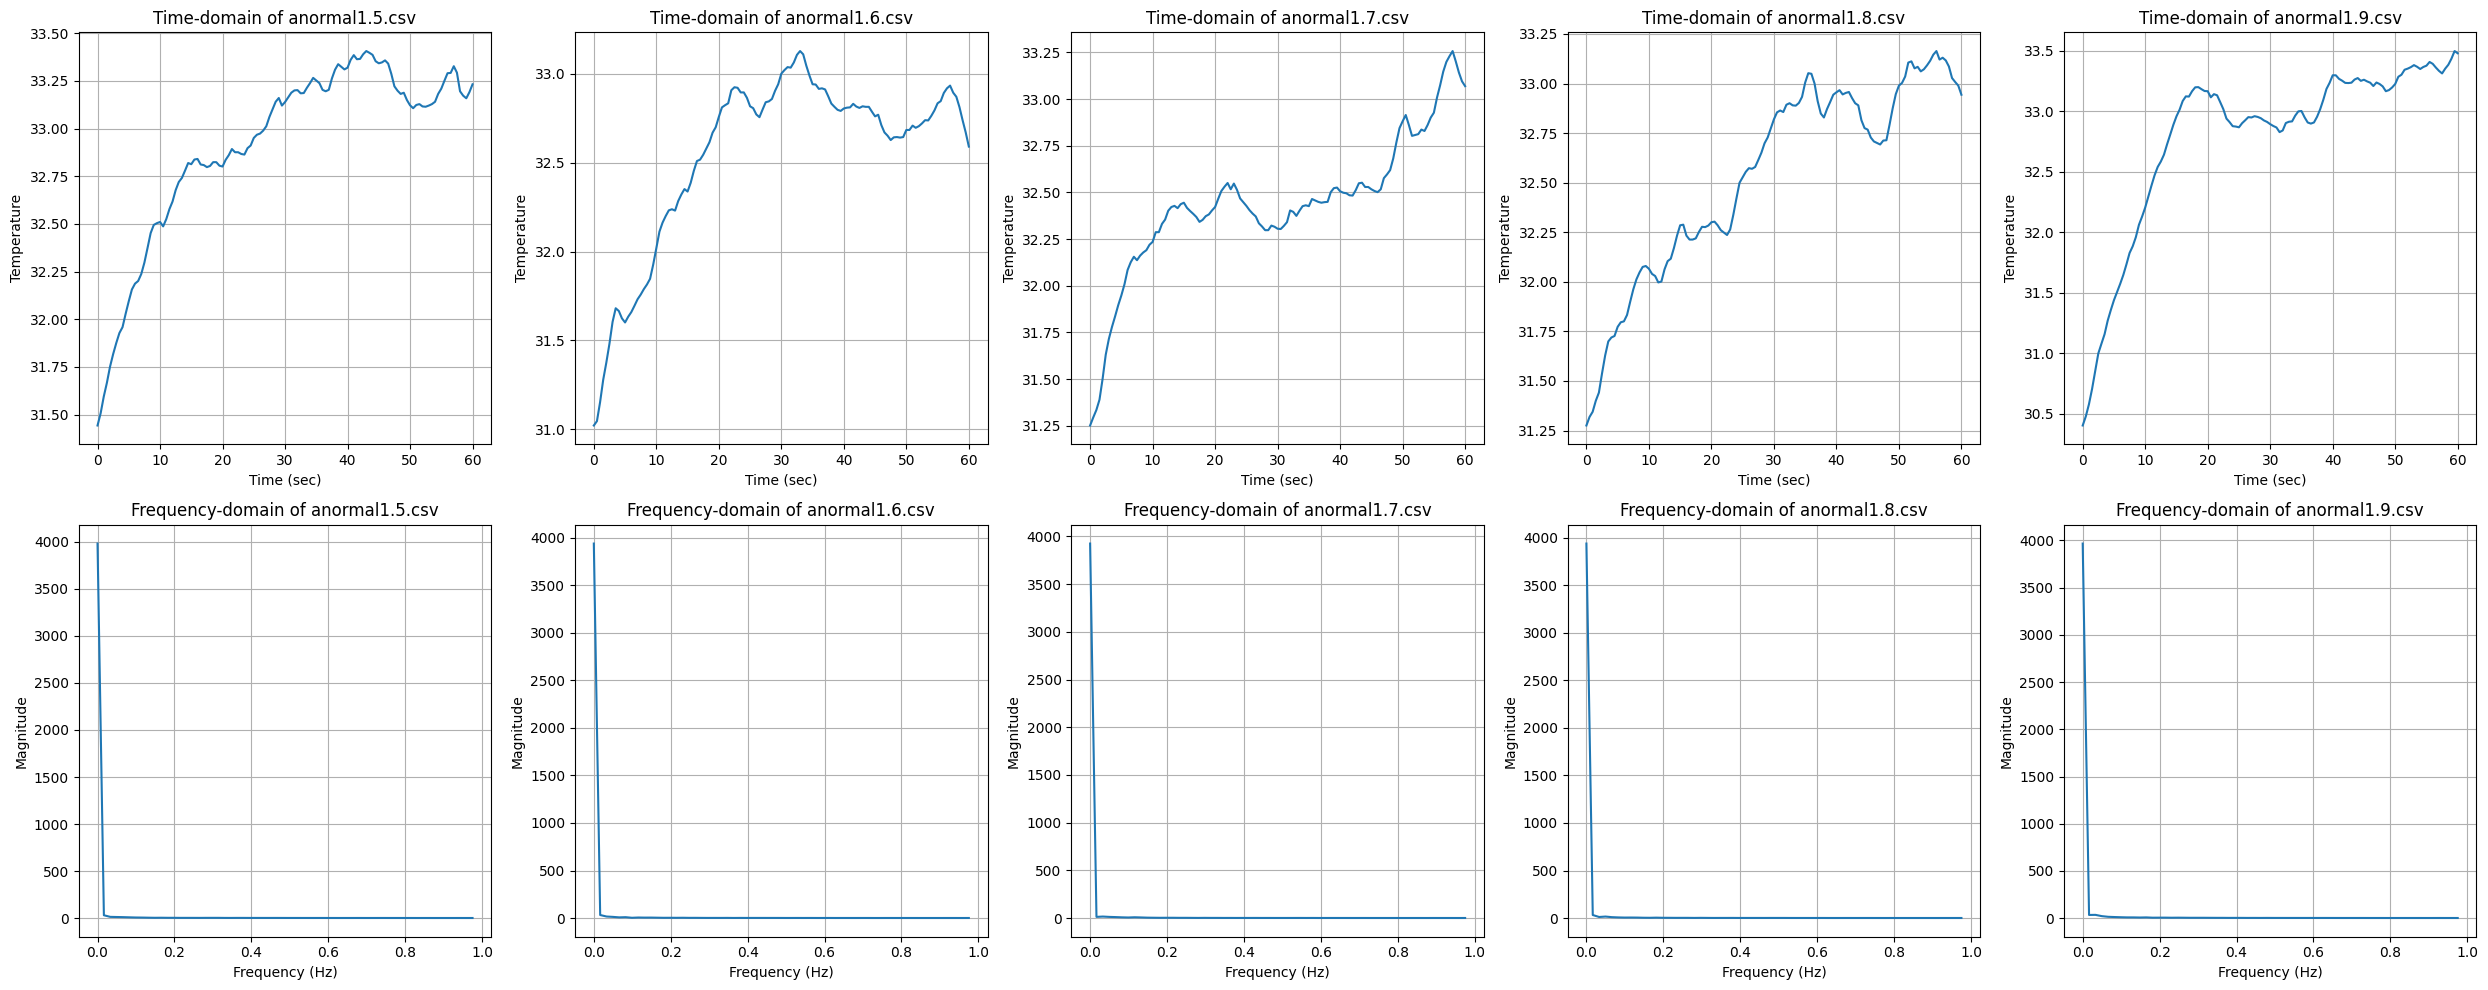

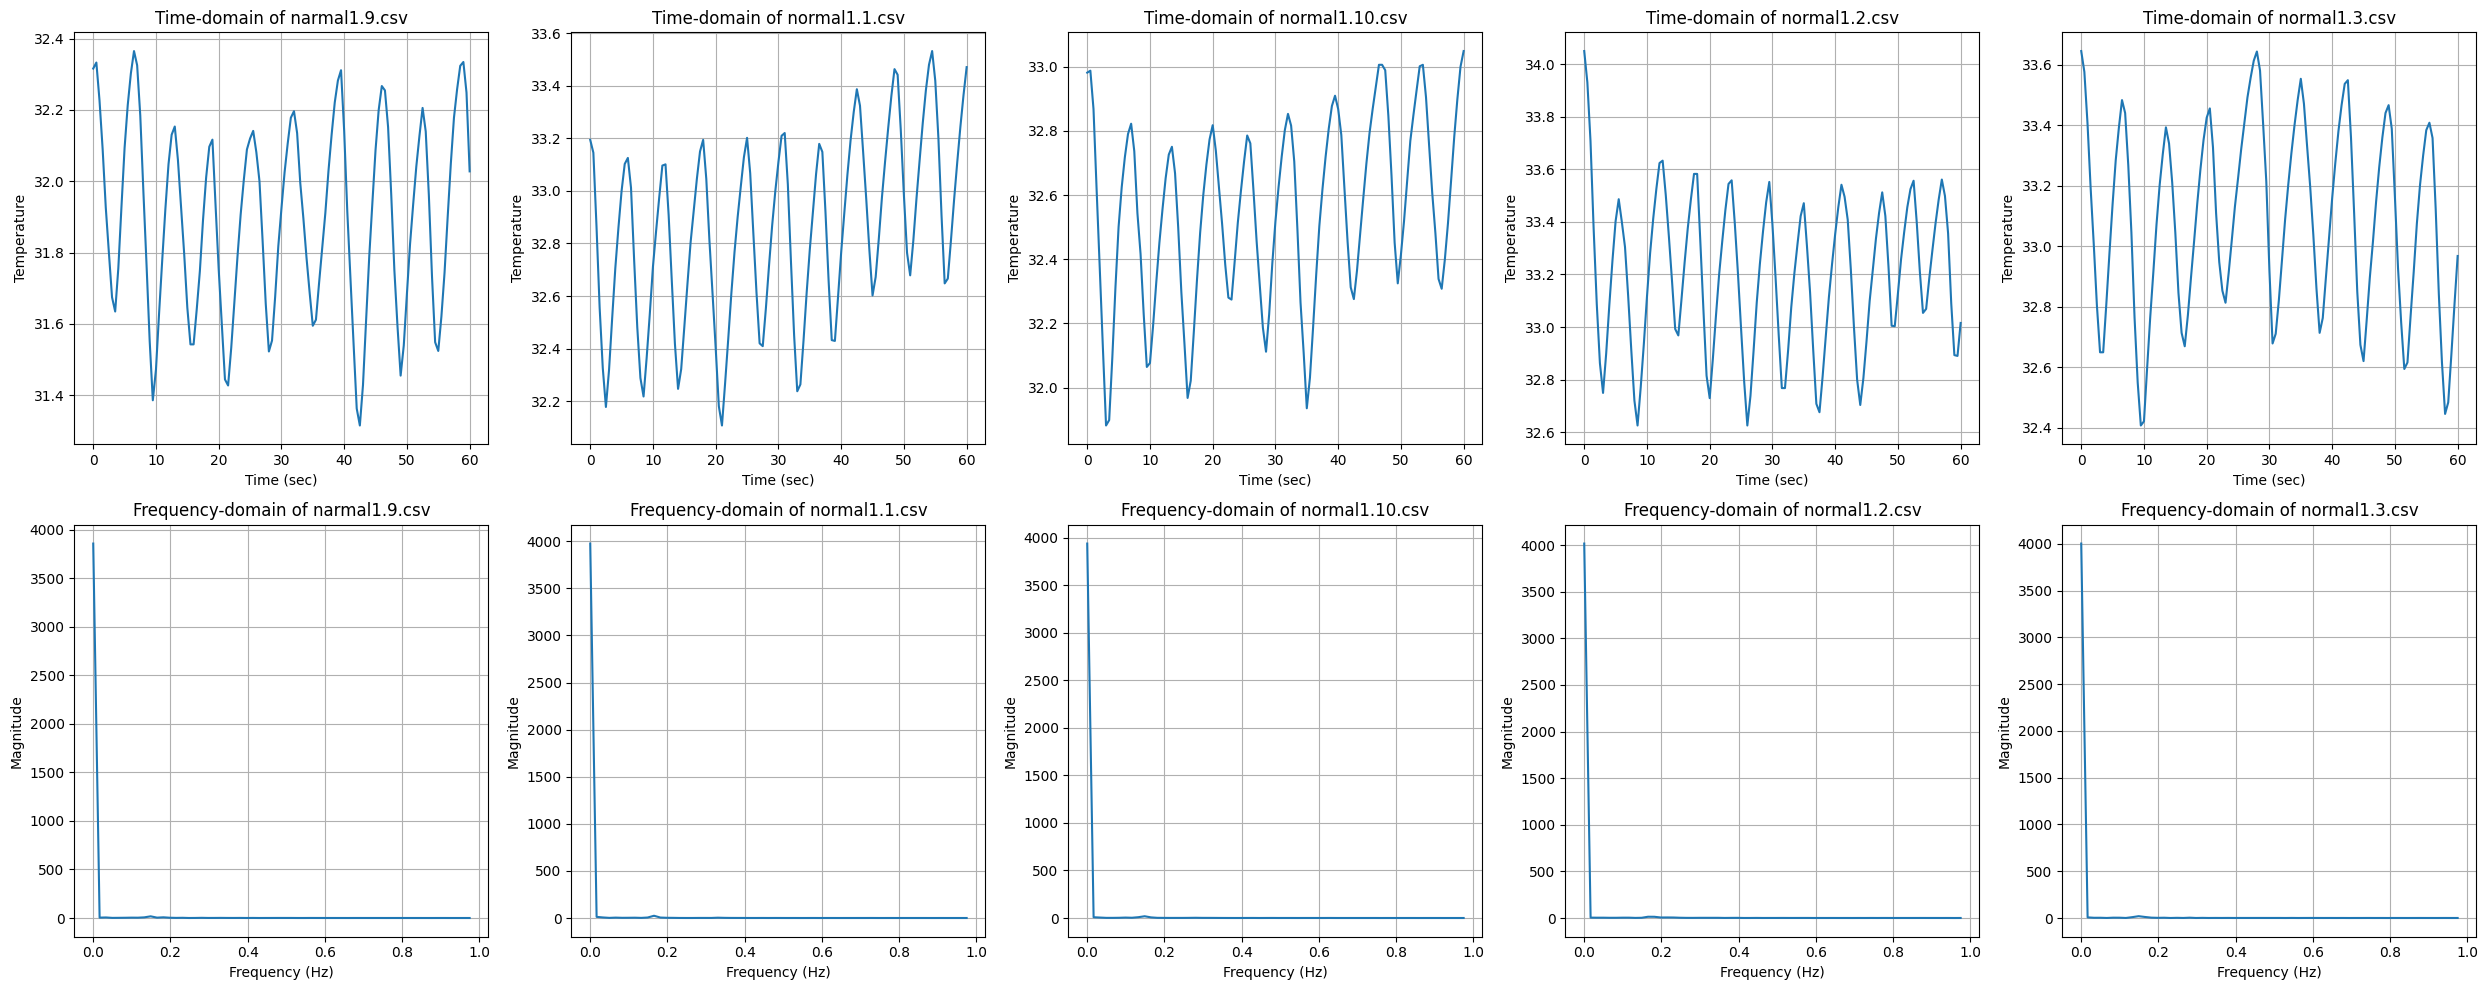

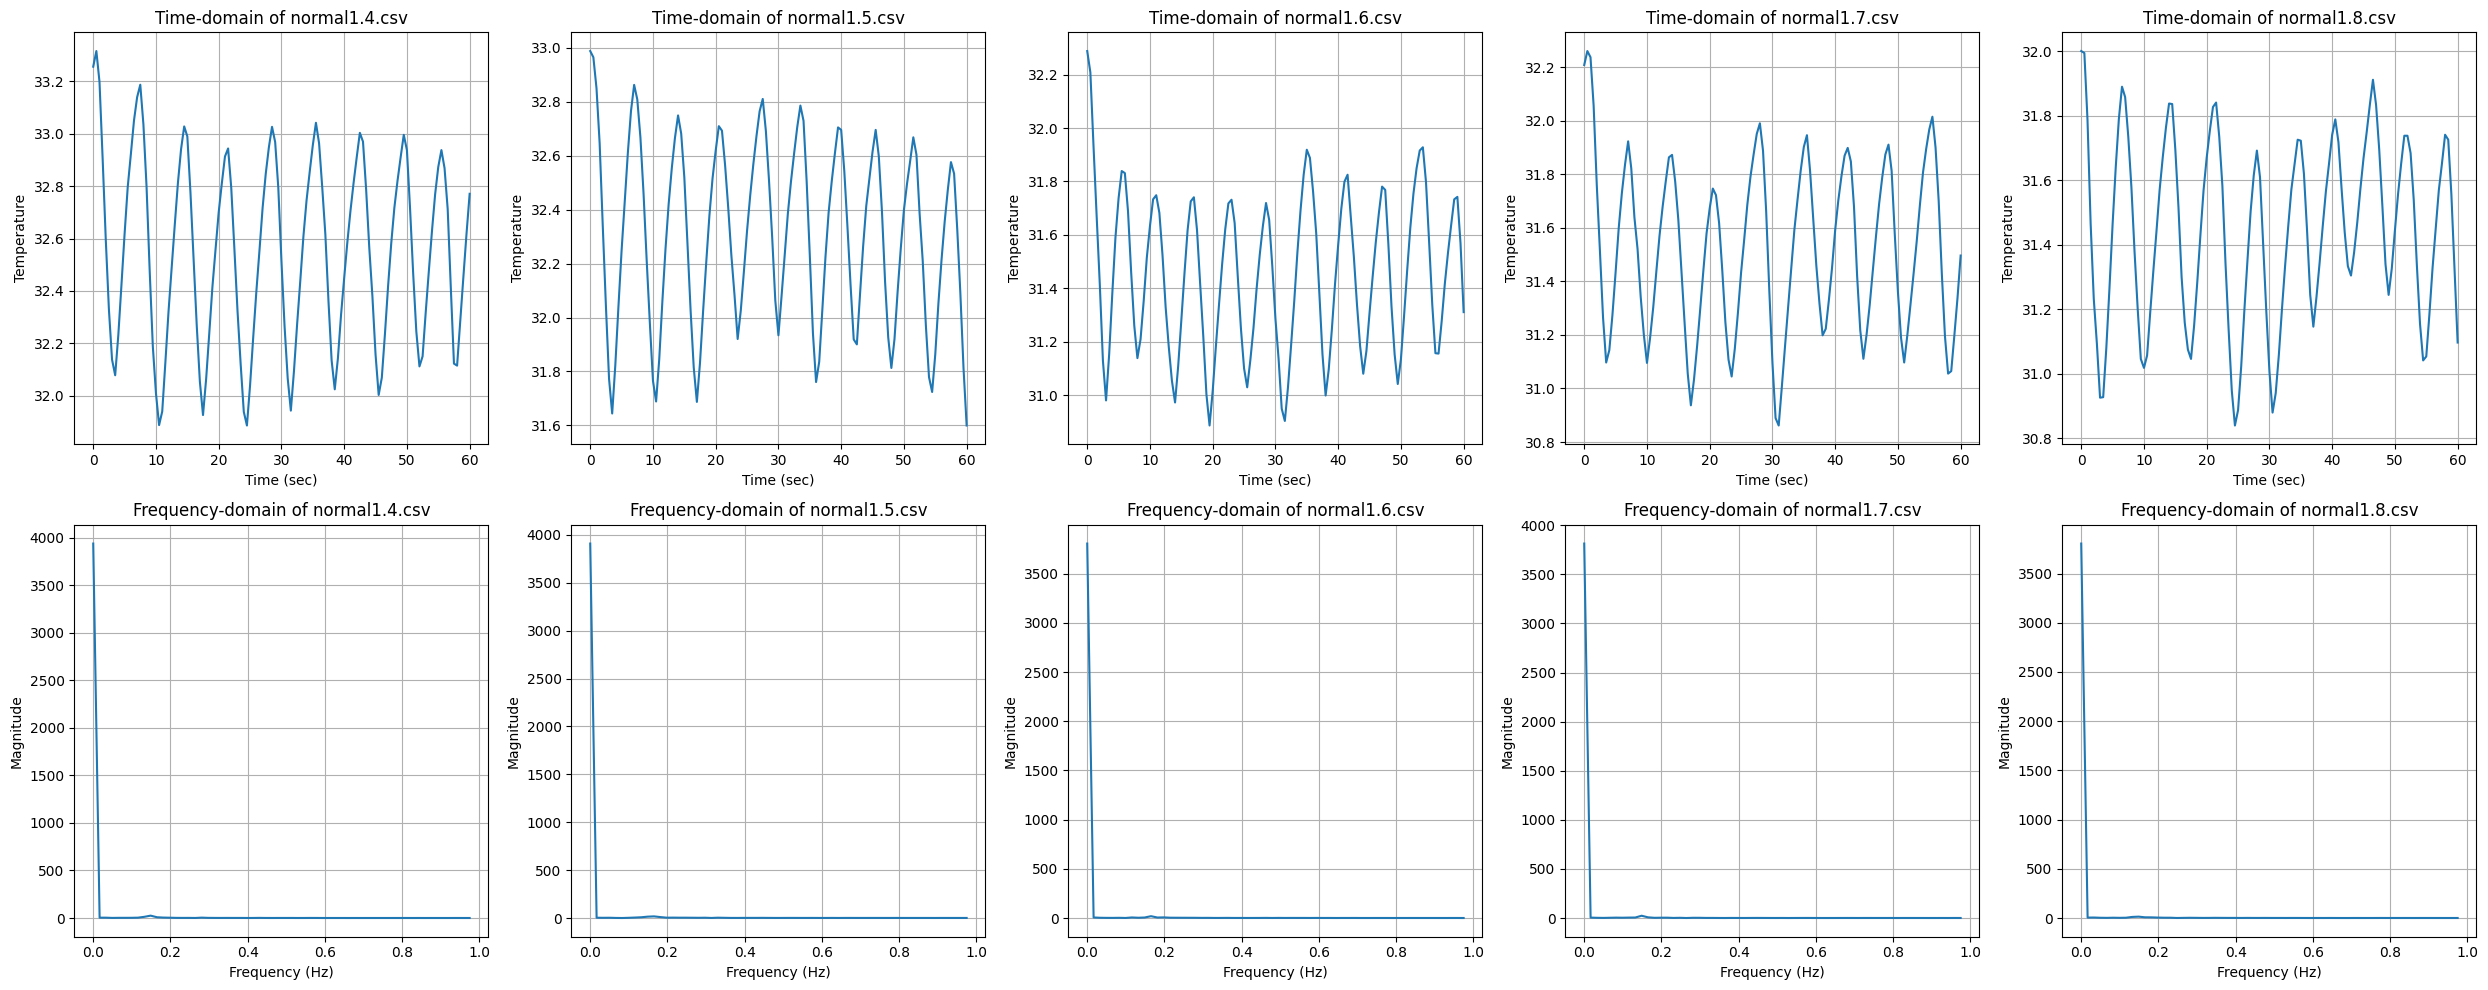

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the base directory and subdirectories
base_dir = '/content/drive/MyDrive/sensor_kmitl'
subdirs = ['anormal', 'normal']

# Collect file paths
file_paths = []
for subdir in subdirs:
    subdir_path = os.path.join(base_dir, subdir)
    for filename in sorted(os.listdir(subdir_path)):
        file_paths.append(os.path.join(subdir_path, filename))

# Function to plot data from CSV files
def plot_files(file_paths, start_index, num_files):
    fig, axs = plt.subplots(2, num_files, figsize=(num_files * 5, 10))

    for i in range(num_files):
        if start_index + i >= len(file_paths):
            break
        file_path = file_paths[start_index + i]
        data = pd.read_csv(file_path)

        # Time-domain plot
        axs[0, i].plot(data['sec'], data['temp'])
        axs[0, i].set_title(f'Time-domain of {os.path.basename(file_path)}')
        axs[0, i].set_xlabel('Time (sec)')
        axs[0, i].set_ylabel('Temperature')
        axs[0, i].grid(True)

        # Compute DFT
        temp_values = data['temp'].values
        N = len(temp_values)
        dft = np.fft.fft(temp_values)
        freqs = np.fft.fftfreq(N, d=(data['sec'][1] - data['sec'][0]))  # Compute frequency bins

        # Frequency-domain plot
        axs[1, i].plot(freqs[:N // 2], np.abs(dft)[:N // 2])  # Plot only the positive frequencies
        axs[1, i].set_title(f'Frequency-domain of {os.path.basename(file_path)}')
        axs[1, i].set_xlabel('Frequency (Hz)')
        axs[1, i].set_ylabel('Magnitude')
        axs[1, i].grid(True)

    plt.tight_layout()
    plt.show()

# Number of files to plot per figure
files_per_figure = 5

# Loop through all files and create figures
for start_index in range(0, len(file_paths), files_per_figure):
    plot_files(file_paths, start_index, files_per_figure)


### Wind

<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].sp

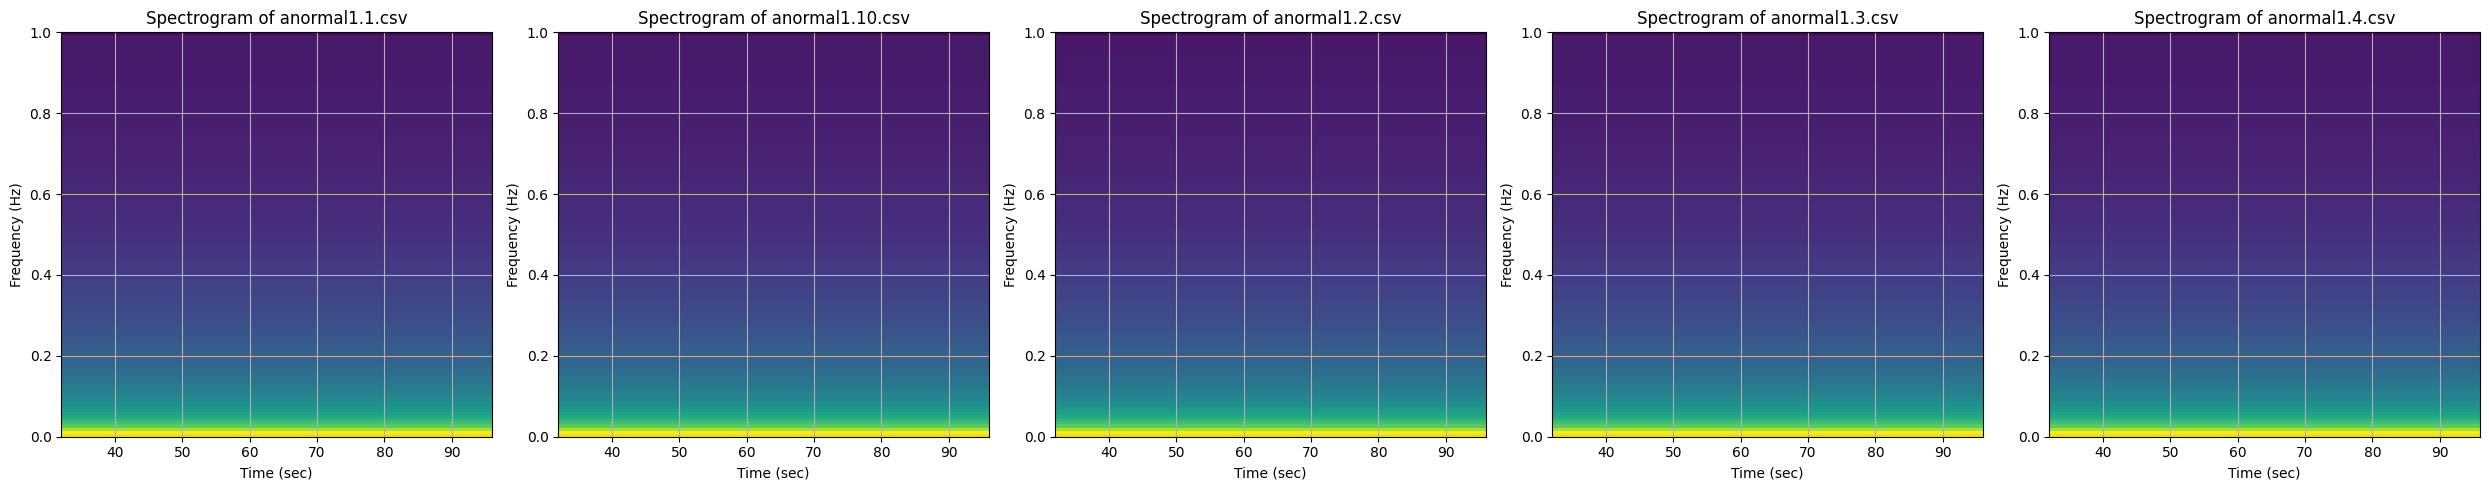

<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].sp

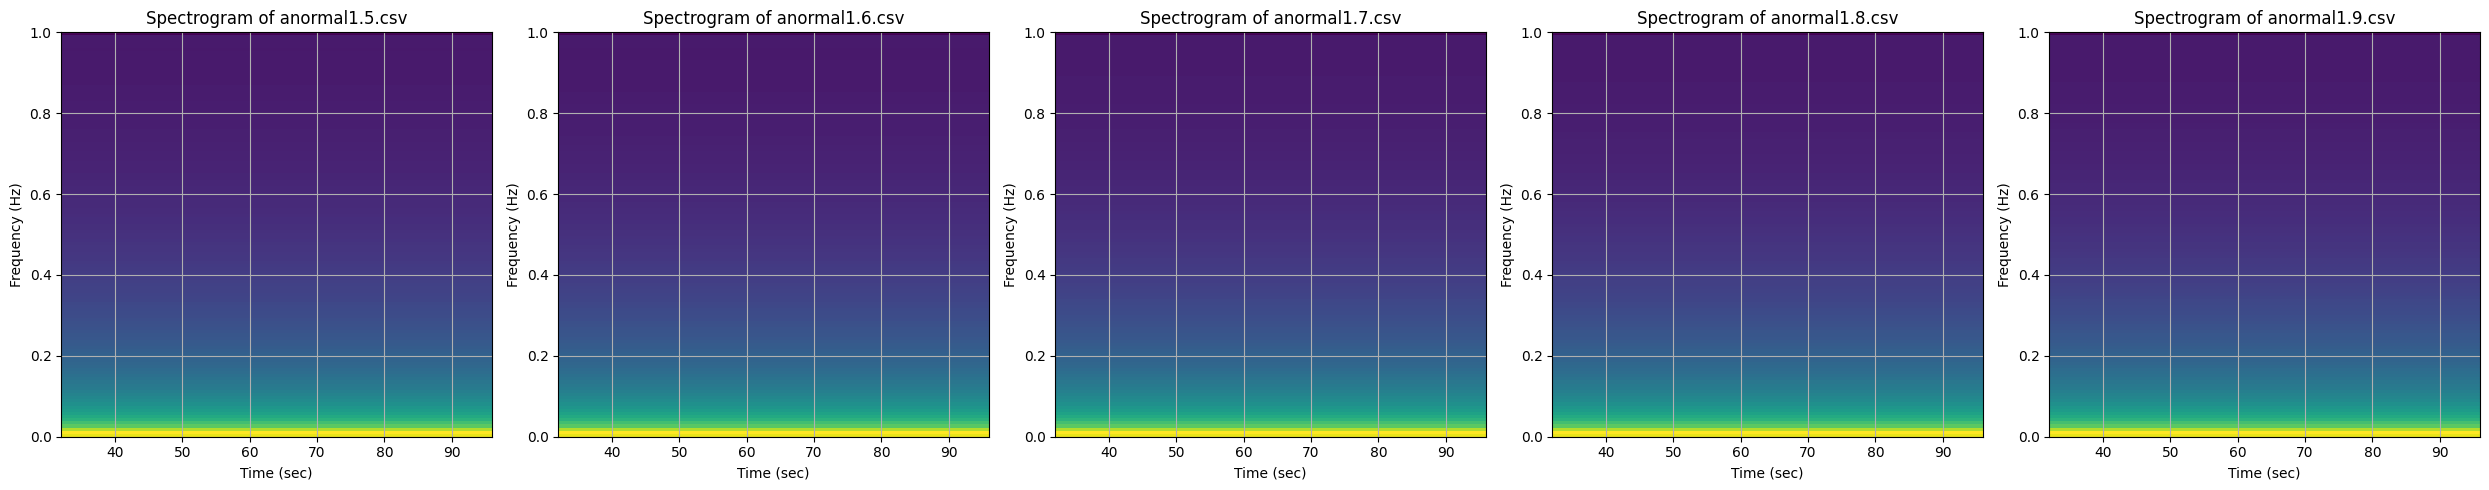

<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].sp

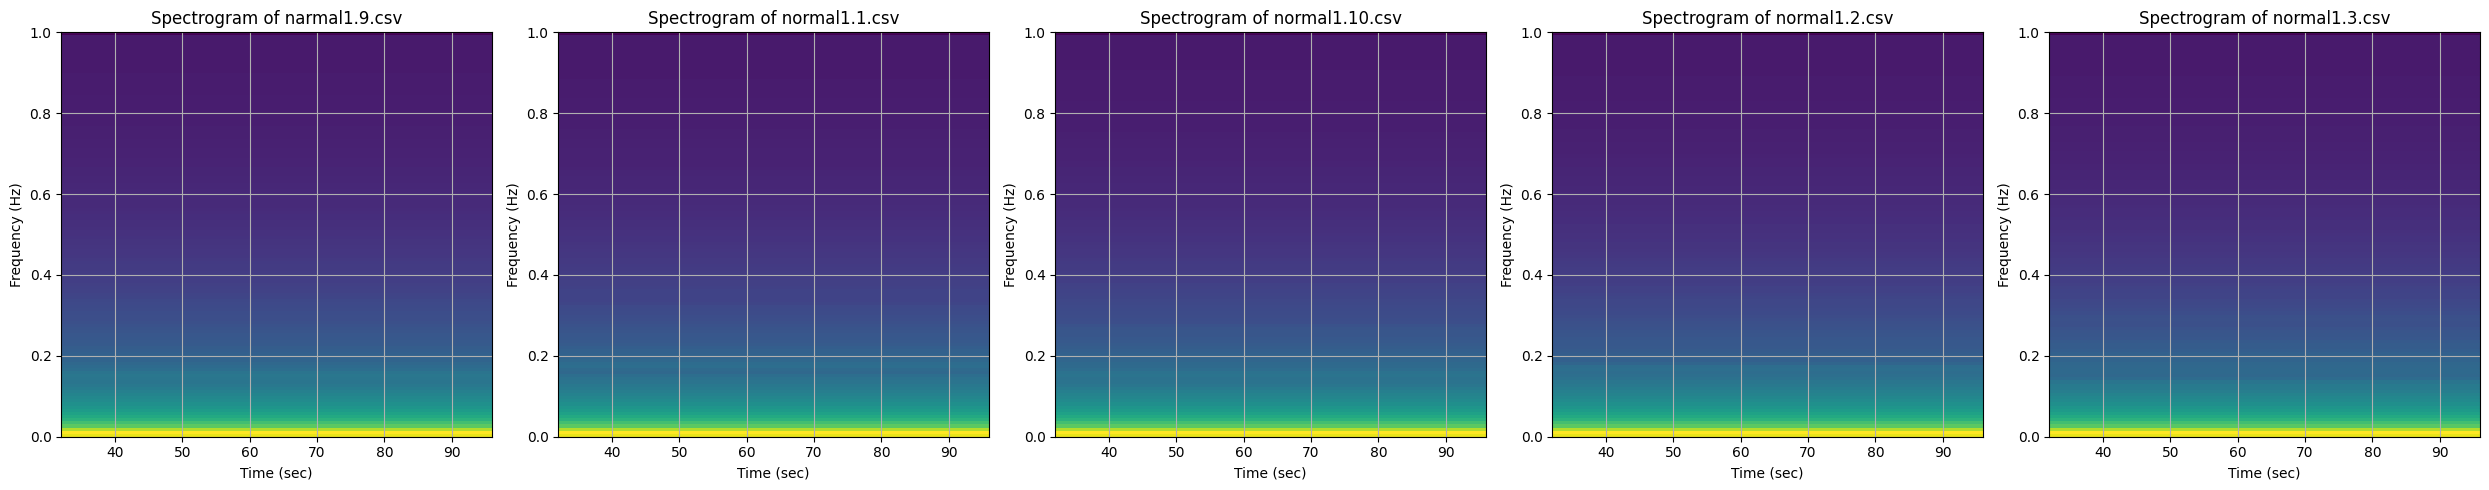

<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
<ipython-input-23-548e8a6585bc>:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=121).
  axs[i].sp

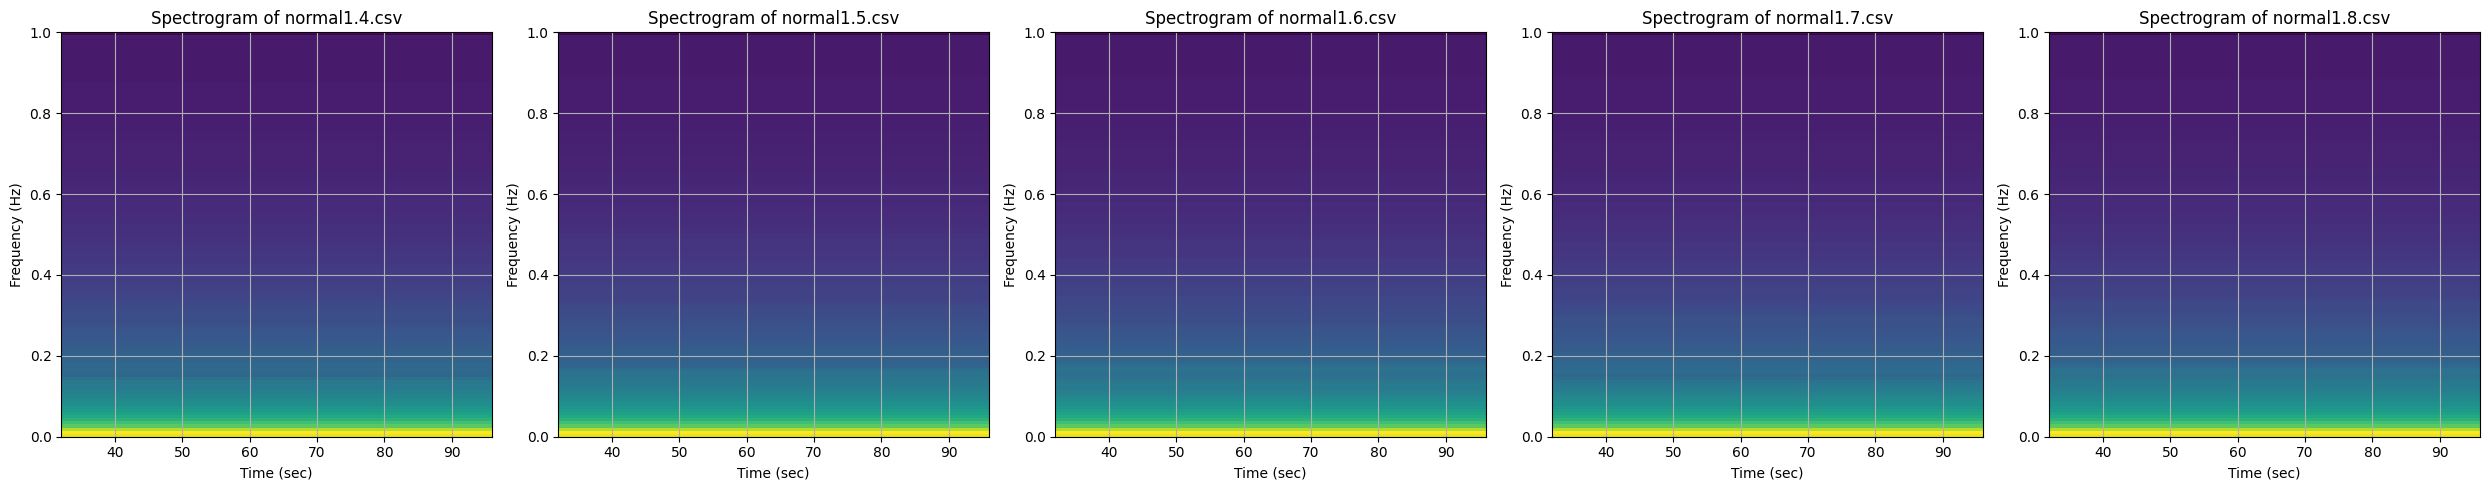

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the base directory and subdirectories
base_dir = '/content/drive/MyDrive/sensor_kmitl'
subdirs = ['anormal', 'normal']

# Collect file paths
file_paths = []
for subdir in subdirs:
    subdir_path = os.path.join(base_dir, subdir)
    for filename in sorted(os.listdir(subdir_path)):
        file_paths.append(os.path.join(subdir_path, filename))

# Function to plot data from CSV files
def plot_files(file_paths, start_index, num_files):
    fig, axs = plt.subplots(1, num_files, figsize=(num_files * 5, 5))

    for i in range(num_files):
        if start_index + i >= len(file_paths):
            break
        file_path = file_paths[start_index + i]
        data = pd.read_csv(file_path)

        # Compute the time step
        dt = np.mean(np.diff(data['sec']))  # Calculate the time step

        # Spectrogram plot
        axs[i].specgram(data['temp'], NFFT=256, Fs=1/dt, noverlap=128, cmap='viridis')
        axs[i].set_title(f'Spectrogram of {os.path.basename(file_path)}')
        axs[i].set_xlabel('Time (sec)')
        axs[i].set_ylabel('Frequency (Hz)')
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# Number of files to plot per figure
files_per_figure = 5

# Loop through all files and create figures
for start_index in range(0, len(file_paths), files_per_figure):
    plot_files(file_paths, start_index, files_per_figure)
